<a href="https://colab.research.google.com/github/takiyama0617/colaboratory/blob/master/sample_sklern_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.svm import SVC

import numpy as np
import sklearn.datasets as datasets
import matplotlib.pyplot as plt


In [0]:
iris = datasets.load_iris()

# 最初の２つの特徴量()の２次元データを使用
first_two_features = iris.data[:, [0, 1]]
teacher_labels = iris.target

# ターゲットはiris virginica以外のもの
# つまり、iris setosa(0)とiris versicolor(1)のみを対象
# （領域の２分割）
first_two_features = first_two_features[teacher_labels != 2]
teacher_labels = teacher_labels[teacher_labels != 2]

### SVM(Support Vector Machine)
*   SVMは教師あり学習の機械学習において、重要な分類と回帰分析のアルゴリズム
*   入力の学習データから、各データ点との距離が最大となる超平面を求める手法







In [6]:
#  分類用にSVC（Support Vector Classifier）を用意する
model = SVC(C=1.0, kernel='linear')

# 最初の２つの特徴点（萼片の長さと幅）を学習させる
model.fit(first_two_features, teacher_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
# 回帰係数
print(model.coef_)

# 切片（誤差）
print(model.intercept_)

[[ 2.22720466 -2.24959915]]
[-4.9417852]


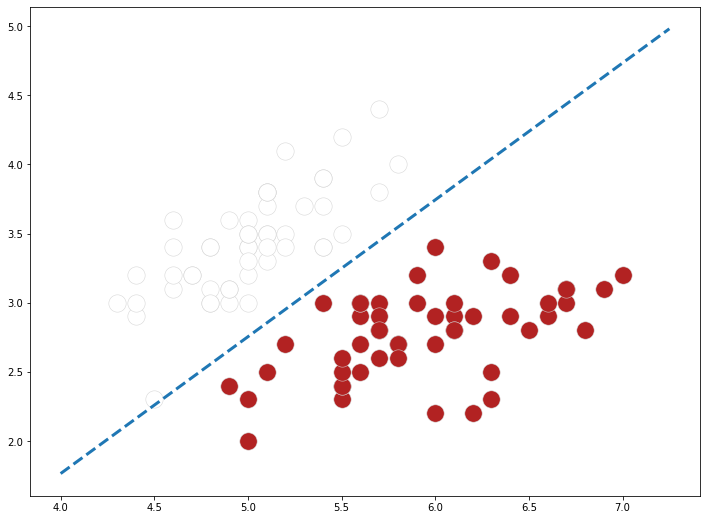

In [11]:
fig, ax = plt.subplots(figsize=(12, 9))

# iris setosa(y=0)のデータを抽出
setosa = first_two_features[teacher_labels == 0]
# iris versicolor(y=1)のデータを抽出
versicolor = first_two_features[teacher_labels == 1]

plt.scatter(setosa[:, 0], setosa[:, 1], s=300, c='white', linewidths=0.5, edgecolors='lightgray')
plt.scatter(versicolor[:, 0], versicolor[:, 1], s=300, c='firebrick', linewidths=0.5, edgecolors='lightgray')

# 回帰直線の描画
Xi = np.linspace(4, 7.25)
# 超平面(線)を描画
Y = -model.coef_[0][0] / model.coef_[0][1] * Xi - model.intercept_ / model.coef_[0][1]

# グラフに線描画
ax.plot(Xi, Y, linestyle='dashed', linewidth=3)
plt.show()